# <img src="../image/reddit.png" width=50> Project 3: APIs, NLP, and Classification
---

# Executive Summary

False constrcution Inc. is new start-up construction company. Company want to reduce human work loads and decided to use machine learning for assisting coordinators work. <br>
In early state of False construction Inc., Civil engineer and architects receive large work loads. They decided to hire a part-time data scientist to set up an actionable and explainable model to classify the work for civil engineers and architects. <br>

**Goal**
- Is model score higher than 53%? (baseline score) <br>

**Model Development**<br>
The corpus we gathered in reddit which subreddit Civil Engineering and Acrhitecture for use develop our models.<br>
We have developed models by exploratory data analysis(EDA) for features selection, stop words for reduce features and accuracy score from models for selecting final model.<br>
Final model is Logistic Regression which fed by stop words removal and lemmatized words, model testing accuracy is 79% which higher than baseline score 26%.<br> 

**Summary**<br>
For summary we developed actionable and explainable Logistic Regrssion model. this model are developed for assisting coordinators work and reduce human work loads in False construction Inc., Futhermore this model might adapt for other work in the company such as classify the research of Civil Enginnering and Achitecture.

---

# Part 1: Problem Statement
---

## 1.1 Problem Statement

In the early state, civil engineer and architect in the company have to receive a large work loads. Then, they decided to hire part-time data scientist to set up the actionable and explainable model to classify the work for civil engineer and architecture.
- Is model accuracy rate high enough to beat baseline model?

## 1.2 BackGround

False Constuction Inc. is a new start up construction company. Because the company want to reduce human work loads and the early state of the company has small number of employee, we decided to use machine learning for assisting coordinator work. We believe that the machine learning in the early state might work in the long term of the company.  

## 1.3 Outside Research

1. For architects are responsible for the design and planning of structures ranging from houses and factories to skyscrapers and museums, civil engineers oversee the entire design-to-completion process for buildings, roads, dams, bridges, water systems, etc. [source](https://online.lsu.edu/newsroom/articles/building-future-architecture-vs-civil-engineering/#:~:text=While%20architects%20are%20responsible%20for,systems%2C%20and%20other%20major%20works.)<br>
2. civil engineering and architecture are two very different beasts, and collaborating is not always smooth. Civil engineers are generally used to a linear process in which they produce calculations, make decisions, and present solutions. But when working with architects, this process tends to zigzag a little more. [source](https://www.engineering.com/story/in-a-great-civil-engineerarchitect-relationship-conflict-breeds-creativity)

# Part 2: Data Wrangling
---

For Data Gatering from reddit using api code show in **[Data Gathering](data_gathering.ipynb)** 

## 2.1 Import Package and Data

In [1]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.style.use('ggplot')

# import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# import nltk and regex for working with text
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

In [2]:
# import warnings for ignore future warning and user warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
corpus = pd.read_csv('../data/civil_arch_corpus.csv')

In [4]:
# display corpus 5 documents
corpus.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,is_gallery,gallery_data,author_cakeday,call_to_action,poll_data,thumbnail_height,thumbnail_width,post_hint,preview,link_flair_template_id
0,NaN,civilengineering,NaN,t2_ex0xi,False,NaN,0,False,2022 Civil Engineering Salary Survey,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,civilengineering,"Post them below. Please include education, exp...",t2_6l4z3,False,NaN,0,False,Monthly Jobs Thread,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,civilengineering,NaN,t2_3dmpwcyo,False,NaN,0,False,Not going to miss being up at 3:30 to test 100...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,civilengineering,NaN,t2_166hoc,False,NaN,0,False,Lack of flood insurance in hard-hit Central Fl...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,civilengineering,So I'm a new inspector and contractor's concre...,t2_12zsk2,False,NaN,0,False,Reliability of Rebound Hammer Test,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# check rows and columns
corpus.shape

(1889, 118)

In [6]:
# check missing values in title columns
corpus['title'].isna().sum()

0

In [7]:
# create two corpus which store only title and title plus selftext
corpus_title = corpus[['subreddit', 'title']]
corpus_title.reset_index(drop=True)

,subreddit,title
0,civilengineering,2022 Civil Engineering Salary Survey
1,civilengineering,Monthly Jobs Thread
2,civilengineering,Not going to miss being up at 3:30 to test 100...
3,civilengineering,Lack of flood insurance in hard-hit Central Fl...
4,civilengineering,Reliability of Rebound Hammer Test
...,...,...
1884,architecture,Name of a sustainable structure (related with ...
1885,architecture,Help me find my purpose in architecture
1886,architecture,how hard are the school?
1887,architecture,cottage study with watercolor


**Data Dictionary**

|Features|Meaning|
|---|---|
|subreddit| subreddit category|
|title| thread title in reddit| 

# Part 3: EDA
---

This section is exploring the insight of the data. The exploration data analysis is below following list:
- Words count of title in each subreddit
- Most common word without stop words removal
- Most common word with stop words removal
- Words Intersection Between Civil Engineering and Architecture
- Normalized words in bag of words 

## Words count of title in each subreddit
Analysis the different between words length of the title in each subreddit.

In [8]:
# count lenhth in title and store in length column
corpus_title['length'] = corpus_title['title'].apply(len)

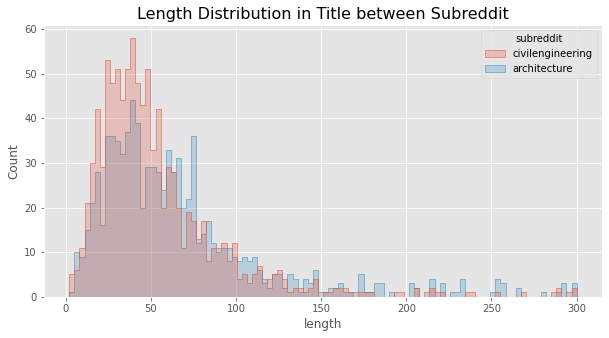

In [9]:
# check length distribution
plt.figure(figsize=(10, 5))
sns.histplot(x='length', hue='subreddit', element='step', bins=100, data=corpus_title)
plt.title('Length Distribution in Title between Subreddit', size=16);

From title length Distribution chart, distributions of word length in both civil engineer and architecture subreddit are little difference between each other.

In [10]:
# Create Class stemtokenizer for stem words
class StemTokenizer:
    '''
    Chop prefix and subfix of tokenized words
    '''
    def __init__(self):
        self.wnl = PorterStemmer()
    def __call__(self, doc):
        regex_num_ponctuation = '(\d+)|([^\w\s])'
        regex_little_words = r'(\b\w{1,2}\b)'
        return [self.wnl.stem(t) for t in word_tokenize(doc) 
                if not re.search(regex_num_ponctuation, t) and not re.search(regex_little_words, t)]

In [11]:
# Create Class lemmatizer for lemmatize words
class LemmaTokenizer:
    '''
    Change tokenized words to root form
    '''
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        regex_num_ponctuation = '(\d+)|([^\w\s])'
        regex_little_words = r'(\b\w{1,2}\b)'
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) 
                if not re.search(regex_num_ponctuation, t) and not re.search(regex_little_words, t)]

In [12]:
# create function for transform text to bag of words and return dataframe
def count_word(data, subreddit, feature, stop_word=None, ngram=(1, 1), method='cv', tokenizer=None):
    '''
    tokenizer words(countvectorizer, tfidfvectorizer) and store in dataframe
    '''
    if method == 'cv':
        cvec = CountVectorizer(stop_words=stop_word, ngram_range=ngram, tokenizer=tokenizer)
        cvec_title = cvec.fit_transform(data[data['subreddit']==subreddit][feature])
        cvec_title_df = pd.DataFrame(cvec_title.todense(), columns=cvec.get_feature_names_out())
        return cvec_title_df
    elif method == 'tfidf':
        tvec = TfidfVectorizer(stop_words=stop_word, ngram_range=ngram, tokenizer=tokenizer)
        tvec_title = tvec.fit_transform(data[data['subreddit']==subreddit][feature])
        tvec_title_df = pd.DataFrame(tvec_title.todensese(), columns=tvec.get_feature_names_out())
        return tvec_title_df

In [13]:
# create function for search words that appear in dataset
def find_word(data, col, word, subreddit=None):
    '''
    return title that contained word in corpus
    '''
    if subreddit == None:
        doc = data[data[col].str.contains(word, case=False, regex=False)][col]
        return doc
    else:
        doc = data[(data['subreddit'] == subreddit) & (data[col].str.contains(word, case=False, regex=False))][col]
        return doc

In [14]:
# create function for plot words bar chart
def barwords(chart_1, title=None):
    '''
    plot barchart words and count 
    '''
    plt.figure(figsize=(12, 7))
    plt.title(title, size=16)
    sns.barplot(x=chart_1, y=chart_1.index)
    plt.xlabel('Length')
    plt.ylabel('Words')

In [15]:
# count values of civil and arch 
corpus_title['subreddit'].value_counts(normalize=True).mul(100).round(2)

civilengineering    52.46
architecture        47.54
Name: subreddit, dtype: float64

## Most common word without stop words removal
In this section, we explore the most common word in both subreddit without stop words removal.

In [16]:
# Transform text in civil engineer subreddit to bag of words without stop words removal
civil_words = count_word(corpus_title, 'civilengineering', 'title').sum().sort_values(ascending=False).head(10)

In [17]:
# Transform text in architecture subreddit to bag of words with stop words removal
arch_words = count_word(corpus_title, 'architecture', 'title').sum().sort_values(ascending=False).head(10)

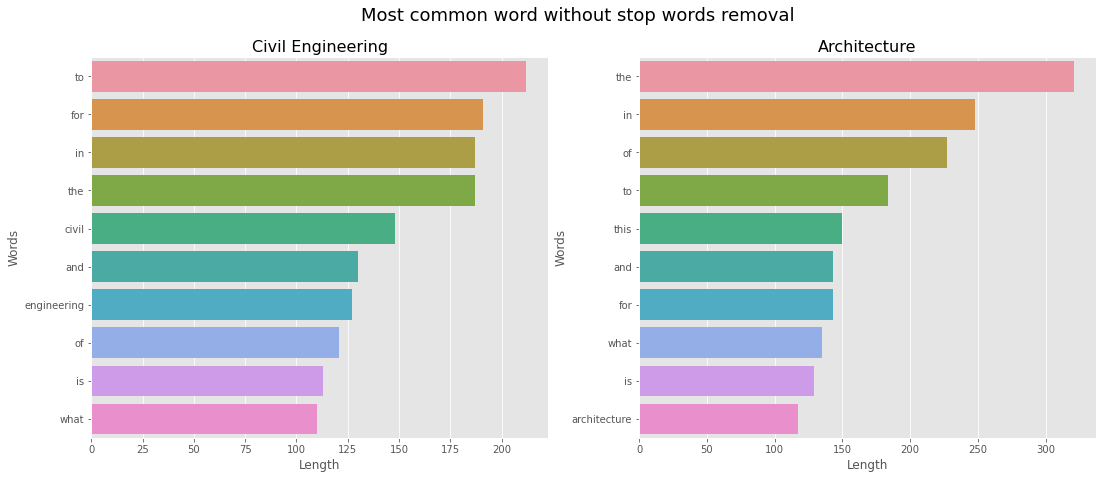

In [18]:
# plot most common words without remove stop words
fig, axes = plt.subplots(ncols=2, figsize=(18, 7))
fig.suptitle('Most common word without stop words removal', size=18)
sns.barplot(x=civil_words, y=civil_words.index, ax=axes[0])
axes[0].set_title('Civil Engineering', size=16)
sns.barplot(x=arch_words, y=arch_words.index, ax=axes[1])
axes[1].set_title('Architecture', size=16)
for i in range(0, 2):
    axes[i].set_xlabel('Length')
    axes[i].set_ylabel('Words')

There are many stop words that appear in the most common word for both subreddit. This result may be not useful for exploring data analysis. Then, we decided to apply the stop words removal to the title in the next section.

## Most common word with stop words removal
After we explored the most common word in the data without stop words removal, the words that extracted aren't mean anything because all of them is preposition. Then applying the stop words removal to bag of words may be the way to solving the problem for both civil engineer and architecture subreddit. 

### Most common word with stop words removal of civil engineering subreddit

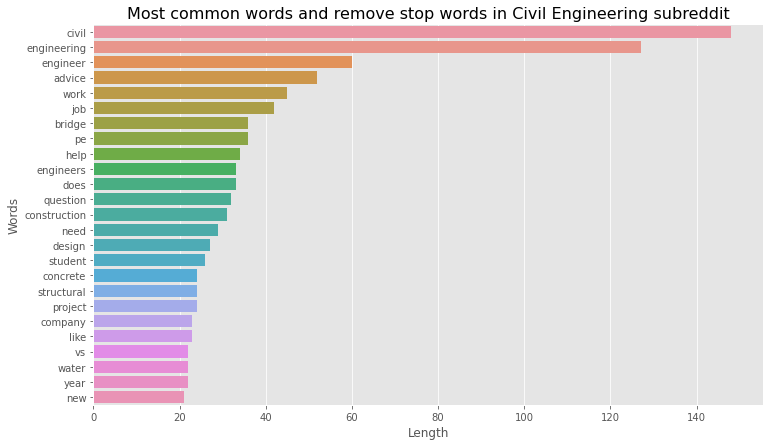

In [19]:
# Transform text in civil engineer subreddit to bag of words with stop words removal
civil_words_del_stopwords = count_word(corpus_title, 'civilengineering', 'title', \
                                   stop_word='english').sum().sort_values(ascending=False).head(25)
barwords(civil_words_del_stopwords, 'Most common words and remove stop words in Civil Engineering subreddit')

The common words in civil engineer subreddit are more meaningful after removing the stopwords from the bag of words. Then, we explored the most common words in bi-gram in civil engineer subreddit.  

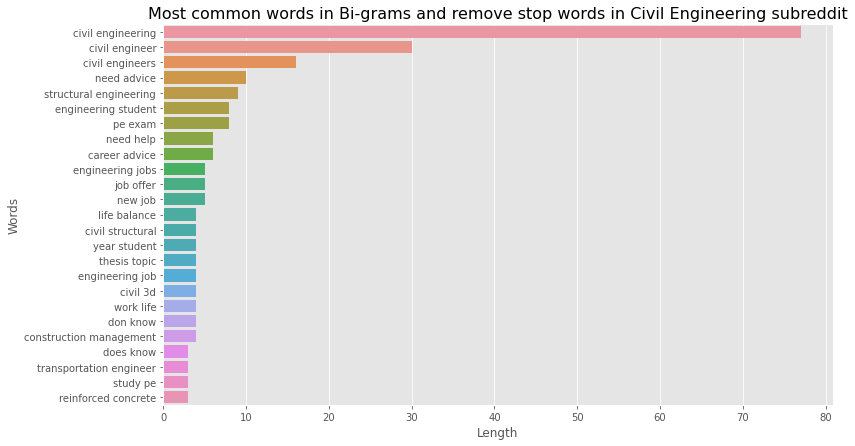

In [20]:
# Transform text in civil engineer subreddit to bag of words with stop words removal and using bi-grams
civil_words_del_stopwords_bi = count_word(corpus_title, 'civilengineering', 'title', stop_word='english',\
           ngram=(2,2)).sum().sort_values(ascending=False).head(25)
barwords(civil_words_del_stopwords_bi, 'Most common words in Bi-grams and remove stop words in Civil Engineering subreddit')

In [21]:
# Transform text in civil engineer subreddit to bag of words with stop words removal, and using tri-gram 
count_word(corpus_title, 'civilengineering', 'title', stop_word='english', ngram=(3,3))\
.sum().sort_values(ascending=False).head(10)

civil engineering student    7
civil engineering jobs       4
work life balance            4
thesis topic suggestion      3
lost need advice             3
civil engineering career     3
final year project           2
ca seismic materials         2
study pe exam                2
courses civil engineers      2
dtype: int64

Common words in both bi-grams and tri-grams aren't meaningful for exploring the data.

In [22]:
# Example of title from civil engineer subreddit that contain word 'civil'
list(find_word(corpus_title, 'title', 'civil', subreddit='civilengineering'))[:5]

['2022 Civil Engineering Salary Survey',
 "I have a YouTube channel with over 700 subscribers. I want to start posting videos of construction work in a site or lab work. Most of my subscribers are civil engineering students. unfortunately, I don't work in any company now, so i can't make any video. I want someone who works in a site or lab",
 'Help with making a resume and projects as a civil engineering student',
 'who works in the Lab as civil engineer in this group?',
 'I’m a civil engineering student and i have a question about sieves test']

In [23]:
# Example of title from civil engineer subreddit that contain word 'bridge'
list(find_word(corpus_title, 'title', 'bridge', subreddit='civilengineering'))[:5]

['Desperately need help with a bridge proposal blueprint',
 'Crimea bridge - engineer perspectives?',
 'What is the effect of a massive fire engulfing a concrete bridge?',
 'Crimean Bridge Fire Rating',
 'Currently Installing bridge Girder. please post here your Girder installation so I can learn more from you guys. Thanks']

The contexts in the title of civil engineer subreddit are roughly about construction and design of the structures. 

### Most common word with stop words removal of architecture subreddit

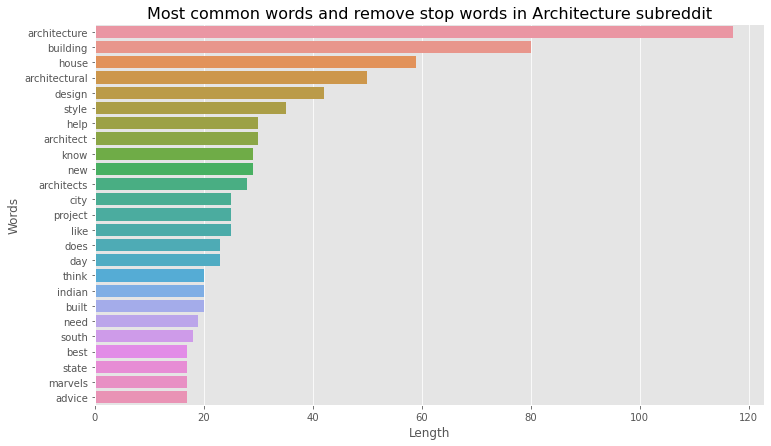

In [24]:
# Transform text in architecture subreddit to bag of words with stop words removal
arch_words_del_stopwords = count_word(corpus_title, 'architecture', 'title', stop_word='english')\
.sum().sort_values(ascending=False).head(25)
barwords(arch_words_del_stopwords, 'Most common words and remove stop words in Architecture subreddit')

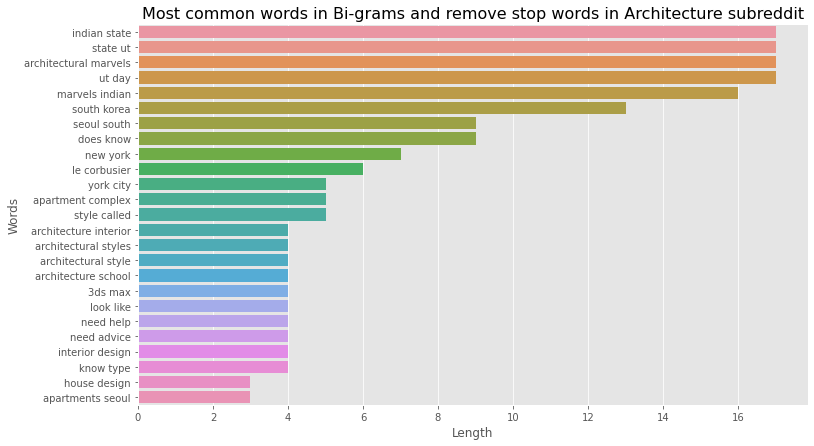

In [25]:
# Transform text in architecture subreddit to bag of words with stop words removal and using bi-grams
arch_words_del_stopwords_bi = count_word(corpus_title, 'architecture', 'title', stop_word='english', ngram=(2,2))\
.sum().sort_values(ascending=False).head(25)
barwords(arch_words_del_stopwords_bi, 'Most common words in Bi-grams and remove stop words in Architecture subreddit')

The common words in architecture subreddit are more meaningful after removing the stop words from the bag of words. In this section, we don't explore the bi-gram and tri-gram because the result from the previous section isn't meaningful. 

In [26]:
# Example of title from architecture subreddit that contain word 'architecture'
list(find_word(corpus_title, 'title', 'architecture', subreddit='architecture'))[:10]

['Greenwashing in Architecture: a survey.',
 'When trying to make a city filled with Neo-Futurism Architecture what would be some ways to properly convey it?',
 'I am making these vector drawings about the traditional architecture of some countries, using the same overall shape. Thoughts?',
 'How to Combine Architecture Styles',
 'Minecraft was the tool that first fostered my interest in architecture. 10 years later I still use it.',
 '19th Century Architecture Identification',
 'i need advice regarding if i continue with architecture',
 'Can I study architecture at uni without taking physics',
 'Architecture experience in University of Victoria VS University of Technology Victoria',
 'Three different styles of Architecture']

In [27]:
# Example of title from architecture subreddit that contain word 'building'
list(find_word(corpus_title, 'title', 'building', subreddit='architecture'))[:10]

['Building information?',
 'Does the 8/infinity symbol shaped building in the center of this image actually exist? If so, where?',
 'any precedent recommendation for an earthquake-proof education building(3-4 storey)?',
 'pretty cool stone building',
 'I’ve posted about this building before. Building owner has gave me free reign on colour scheme. It’s a big space for me to wrap my head around. Any advice?',
 'How frank Gehry did patients so dirty by building center for brain health like this always cracks me up',
 'Sail Towers is a cable-stayed building prototype that pushes the architecture boundary forward by combining structural engineering systems used for both land and sea, so buildings of the future can be safely built along coastlines or even “in the water” with the advent of rising sea levels n surges.',
 'What is the most beautiful building in New York City?',
 'The General Electric Building, New York City. Designed by Cross &amp; Cross (1931)',
 'Do you know where you can get

The contexts in the title of architecture subreddit are roughly about shape, style, and material of the structures. 

## Words Intersection Between Civil Engineering and Architecture

In [28]:
# Find words that overlap between civil engineer and architecture
most_words_civil = count_word(corpus_title, 'civilengineering', 'title', stop_word='english')
most_words_arch = count_word(corpus_title, 'architecture', 'title', stop_word='english')

# Use intersect in set class for finding the overlapping words
set(most_words_civil.sum().sort_values(ascending=False).head(50).index).intersection\
(set(most_words_arch.sum().sort_values(ascending=False).head(50).index))

{'advice',
 'amp',
 'best',
 'building',
 'construction',
 'design',
 'does',
 'good',
 'help',
 'just',
 'know',
 'like',
 'looking',
 'need',
 'new',
 'project',
 'software',
 'work',
 'working',
 'year'}

### Exploring the title that contain intersection words

In [29]:
# Title of thread in civil engineer subreddit that contain the words 'building'
print(f"Title of thread in civil engineer subreddit that contain the words 'building'")
list(find_word(corpus_title, 'title', 'building', subreddit='civilengineering'))[:10]

Title of thread in civil engineer subreddit that contain the words 'building'


['Need feedbacks and approval for my groups research about "Green Buildings"',
 'ICC Building Plan Inspector',
 'Building structural designs',
 'Foundation,building question.',
 'Building a Project Execution Software and Would Like Your Input',
 "Thought this belonged I studied mass dampening using this building as I'm sure many others did.",
 'Bridge Building Competition Strategies/tips (?)',
 'Does anyone know the dimensions of this NY pipe coming from a building? ( I know it is an ask )',
 'Question on calculating building energy consumption',
 "how to repair in these kind of situations? It's a 13 year old building. Exposed to 40°C and damped and dusty environments."]

In [30]:
# Title of thread in architecture subreddit that contain the words 'building' 
print(f"Title of thread in architecture subreddit that contain the words 'building'")
list(find_word(corpus_title, 'title', 'building', subreddit='architecture'))[:10]

Title of thread in architecture subreddit that contain the words 'building'


['Building information?',
 'Does the 8/infinity symbol shaped building in the center of this image actually exist? If so, where?',
 'any precedent recommendation for an earthquake-proof education building(3-4 storey)?',
 'pretty cool stone building',
 'I’ve posted about this building before. Building owner has gave me free reign on colour scheme. It’s a big space for me to wrap my head around. Any advice?',
 'How frank Gehry did patients so dirty by building center for brain health like this always cracks me up',
 'Sail Towers is a cable-stayed building prototype that pushes the architecture boundary forward by combining structural engineering systems used for both land and sea, so buildings of the future can be safely built along coastlines or even “in the water” with the advent of rising sea levels n surges.',
 'What is the most beautiful building in New York City?',
 'The General Electric Building, New York City. Designed by Cross &amp; Cross (1931)',
 'Do you know where you can get

In [31]:
# Title of thread in civil engineer subreddit that contain the words 'construction'
print("Title of thread in civil engineer subreddit that contain the words 'construction'")
list(find_word(corpus_title, 'title', 'construction', subreddit='civilengineering'))[:10]

Title of thread in civil engineer subreddit that contain the words 'construction'


["I have a YouTube channel with over 700 subscribers. I want to start posting videos of construction work in a site or lab work. Most of my subscribers are civil engineering students. unfortunately, I don't work in any company now, so i can't make any video. I want someone who works in a site or lab",
 'Sand Storms &amp; Construction Of Desert Pyramids: What do you think?',
 'Construction Inspector and Contractor Superintendent explain the process of pouring concrete for sidewalks. Construction Administration is essential in ensuring the integrity of the projects we design. Kudos to all the inspectors out there!',
 'Construction noise management',
 'Failure during construction',
 'What are some of the construction technology trends to look out for in 2023?',
 'Need case history stories about soil problems in construction, problems with contractors, legal cases etc.',
 'Transitioning from Design to a construction ? Salary question',
 'Masters in Business Administration or Masters in Con

In [32]:
# Title of thread in architecture subreddit that contain the words 'construction'
print("Title of thread in architecture subreddit that contain the words 'construction'")
list(find_word(corpus_title, 'title', 'construction', subreddit='architecture'))[:10]

Title of thread in architecture subreddit that contain the words 'construction'


['Help with material and construction technique. Currently designing a residence in India and would like to give a similiar finish to the roof slab (the part that looks like a steel C section along the slab). Can ik how this can be done',
 'Principles and Method of Construction of Sand Dune Pyramids',
 'My biggest project to date, reconstruction of the Roman city of Timgad (modern day Algeria) in North Africa. Founded by Trajan around 100 CE for his veterans.',
 'Any Advice appreciated: BA in Anthro, currently working in construction, want to pursue Architecture',
 'What material is this black part of the facade and is there a construction method available somewhere online?',
 '[technical] Medieval construction materials (XI-XII century): stone, timber, lead, iron, etc.',
 'Any advice appreciated: BA in Anthropology, currently working in construction, want to pursue Architecture',
 'New flats under construction to replace post war extension of a victorian building in London, UK',
 'Wha

In [33]:
# Title of thread in civil engineer subreddit that contain the words 'design'
print("Title of thread in civil engineer subreddit that contain the words 'design'")
list(find_word(corpus_title, 'title', 'design', subreddit='civilengineering'))[:10]

Title of thread in civil engineer subreddit that contain the words 'design'


['Construction Inspector and Contractor Superintendent explain the process of pouring concrete for sidewalks. Construction Administration is essential in ensuring the integrity of the projects we design. Kudos to all the inspectors out there!',
 'Building structural designs',
 'Soon to be PE who has never designed anything',
 'Best software for designing steel frame structures',
 'Why is shorter span considered for both Mx and My in design of two way slabs?',
 'Porous Pavement Design Question',
 'Not in the mix design',
 'Corridor Design for Culdesac with grass circle in the middle?',
 'My final year project is designing a flood gate for houses and shops to protect from urban flooding. Is this really relevent to hydraulics and civil engineering?',
 'Unforeseen design issue, how to solve?']

In [34]:
# Title of thread in architecture subreddit that contain the words 'design'
print("Title of thread in architecture subreddit that contain the words 'design'")
list(find_word(corpus_title, 'title', 'design', subreddit='architecture'))[:10]

Title of thread in architecture subreddit that contain the words 'design'


['Help with material and construction technique. Currently designing a residence in India and would like to give a similiar finish to the roof slab (the part that looks like a steel C section along the slab). Can ik how this can be done',
 'Interview with facade designer. I will be asked to draw some details in interview. What should I focus on when drawing details of facade? I’m an Architectural Technologist.',
 'Can you guys help me? Is this design so "idiotic"? Read my comment for more information, please!',
 'Feedback on design',
 'Architects, how do you find your design professionals?',
 'Had AI design a 3000 Sq ft house',
 'Mixed use landmark tower design concept for Indonesia’s Nusantara development. Critique?',
 'What kind of vibes this house design gives you?',
 'Enscape for Product Design Rendering?',
 'Soviet Textbooks Describing How to Design Microrayons?']

**Comparison between title from civil engineer and architecture subreddit that contain the words:**

1. **Building**:
    - Civil engineer: Focusing on the structure of the building.
    - Architecture: Focusing on shape and color of the building.


2. **construction**
    - Civil engineer: The contexts are about construction management. 
    - Architecture: The contexts are mostly about construction material.  
    
    
3. **design**
    - This word in both subreddits is hard to explain and compare because redditors use this word in various ways in the threads.

## Normalized words in bag of words  
Reducing the features for more practial to use in the both EDA and modeling. In this project, we normalize the text by using stemmer and lemmatizer.


### Stemming
Stemming is more brute force to normalize the text.

In [35]:
# tokenize using stem in subreddit civil engineer
count_word(corpus_title, 'civilengineering', 'title', stop_word='english', tokenizer=StemTokenizer())\
.sum().sort_values(ascending=False).head(25)

engin        217
civil        148
thi           72
work          71
job           56
advic         52
ani           41
design        40
bridg         38
structur      37
need          36
help          36
question      36
project       35
doe           34
anyon         34
year          31
use           30
student       30
construct     30
compani       29
look          26
like          24
career        24
concret       23
dtype: int64

In [36]:
# tokenize using stem in subreddit architecture
count_word(corpus_title, 'architecture', 'title', stop_word='english', tokenizer=StemTokenizer())\
.sum().sort_values(ascending=False).head(25)

architectur    164
thi            150
build          103
hous            75
design          63
architect       56
style           43
project         34
know            32
help            31
citi            30
look            30
new             29
work            29
anyon           28
ani             28
use             27
like            26
wa              26
render          25
doe             24
day             23
home            22
think           22
need            21
dtype: int64

Since, words that stemmed from stemmer lost some characters, It may be hard to find the context of stemmed words. Using the stemmed words in the model may be hard to evaluate the model, then we decided to not used the stemmed words for modeling. 

### Lemmatizing
Lemmatizing is the softer way to normalize the text. 

In [37]:
# tokenize using lemmatize
count_word(corpus_title, 'civilengineering', 'title', stop_word='english', tokenizer=LemmaTokenizer())\
.sum().sort_values(ascending=False).head(10)

civil          147
engineering    126
engineer        91
job             56
advice          52
work            48
bridge          38
question        36
help            35
project         35
dtype: int64

In [38]:
# transform text in renew label to bag of words and remove stop words
count_word(corpus_title, 'architecture', 'title', stop_word='english', tokenizer=LemmaTokenizer())\
.sum().sort_values(ascending=False).head(10)

architecture     115
building          97
house             66
architect         56
architectural     49
style             43
design            43
project           33
know              32
help              30
dtype: int64

The Lemmatized words from both subreddits are better than stemmed words. Then, we decided to try the lemmatized words for training the model in the next section.

# Part 4: Modeling

## Train Test Split

In [39]:
# create feature and target variable
X = corpus_title['title']
y = corpus_title['subreddit']

In [40]:
# change label in target civil engineering = 1, architecture = 0
y = y.map({'architecture':0, 'civilengineering':1})

In [41]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state = 42)

## Logistic Regression

Use Logistic Regression create Baseline for compare other models 

In [42]:
# calculate baseline for compare to model
y_test.value_counts(normalize=True).mul(100).round(2)

1    53.28
0    46.72
Name: subreddit, dtype: float64

**Baseline** accuracy is 53.3%

In [43]:
def get_X_vectorizer(model):
    '''
    return tokenizer
    '''
    X_train_vec = model.fit_transform(X_train)
    X_test_vec = model.transform(X_test)
    return X_train_vec, X_test_vec

In [44]:
def evaluation(model, X_train_vec, X_test_vec):
    '''
    return accuracy score from train and test
    '''
    y_preds = model.predict(X_test_vec)
    train_acc = round(model.score(X_train_vec,y_train),4)
    test_acc = round(model.score(X_test_vec,y_test),4)
    f1_test = round(f1_score(y_test, y_preds),4)
    print(f'Training accuracy: {train_acc}')
    print(f'Testing accuracy: {test_acc}')
    print(f'Testing f1 score:{f1_test}')
    cm = confusion_matrix(y_test,y_preds)
    ConfusionMatrixDisplay(cm,display_labels=model.classes_)\
    .plot(colorbar=False, cmap = 'Blues');
    return [train_acc, test_acc, f1_test]

In [45]:
def coeff_log(model,label,amount):
    """Function extract the coefficient from logistic regression model"""
    if label == 0:
        print(pd.DataFrame(logreg.coef_[0],\
                     index=cvec.get_feature_names_out())[0].sort_values().head(amount))
    else:
        print(pd.DataFrame(logreg.coef_[0],\
                     index=cvec.get_feature_names_out())[0].sort_values().tail(amount))

### 1st Iteration: Basic Logistic Regression model
Vectorizer: Countvectorizer
1. Logistic Regression without lemmatized word
2. Logistic Regression with lemmatized word

# Columns without lemmatized word: 3490
Training accuracy: 0.9831
Testing accuracy: 0.8097
Testing f1 score:0.8327


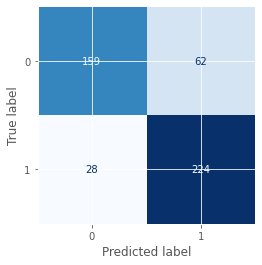

In [46]:
# 1st iteration: Logistic Regression without lemmatized word
# Vectorize
cvec = CountVectorizer(stop_words='english')
X_train_cvec, X_test_cvec = get_X_vectorizer(cvec)
print(f'# Columns without lemmatized word: {X_train_cvec.shape[1]}')

# Fit or train the model
logreg = LogisticRegression()
logreg.fit(X_train_cvec,y_train)

# Evaluation
first_iter_1 = evaluation(logreg, X_train_cvec, X_test_cvec)

In [47]:
# 1st iteration: No lemmatized word
# label 0 mean architecture
coeff_log(logreg,0,10)

architecture    -3.076251
house           -2.012761
architects      -1.987325
architectural   -1.976385
style           -1.871416
architect       -1.691552
building        -1.633661
portfolio       -1.157109
sketch          -1.075828
world           -1.020371
Name: 0, dtype: float64


In [48]:
# 1st iteration: No lemmatized word
# label 1 mean civil engineer
coeff_log(logreg,1,10)

water          1.017402
career         1.029231
concrete       1.303184
company        1.316912
engineers      1.369632
engineer       1.521022
pe             1.563878
bridge         1.710502
engineering    1.976793
civil          2.221886
Name: 0, dtype: float64


# Columns with lemmatized word: 2941
Training accuracy: 0.9753
Testing accuracy: 0.7928
Testing f1 score:0.8172


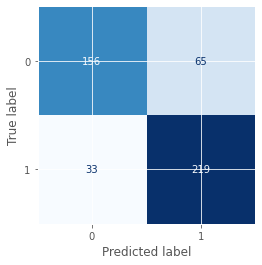

In [49]:
# 1st iteration: Logistic Regression with lemmatized word
# Vectorize
cvec = CountVectorizer(stop_words='english',tokenizer=LemmaTokenizer())
X_train_cvec, X_test_cvec = get_X_vectorizer(cvec)
print(f'# Columns with lemmatized word: {X_train_cvec.shape[1]}')

# Fit or train the model
logreg = LogisticRegression()
logreg.fit(X_train_cvec,y_train)

# Evaluation
first_iter_2 = evaluation(logreg, X_train_cvec, X_test_cvec)

In [50]:
# 1st iteration: Lemmatized word
# label 0 mean architecture
coeff_log(logreg,0,10)

architecture    -3.137663
architect       -2.308653
house           -2.002022
architectural   -1.981419
style           -1.868514
building        -1.563301
portfolio       -1.197503
home            -1.152780
render          -1.151530
chicago         -1.093254
Name: 0, dtype: float64


In [51]:
# 1st iteration: Lemmatized word
# label 1 mean civil engineer
coeff_log(logreg,1,10)

opportunity    0.983053
highway        1.011255
career         1.090043
water          1.114952
concrete       1.276447
company        1.542463
bridge         1.608043
engineer       1.868657
engineering    1.953601
civil          2.156839
Name: 0, dtype: float64


After looked at coefficient there are some words that have similar or meaning the same as our targets. Thus, we evaluated they are cheat words e.g. Civil, Engineering, Architecture, architect <br>

### 1st Iteration conclusion
Vectorizer: Countvectorizer
1. Logistic Regression without lemmatized word
2. Logistic Regression with lemmatized word

In [52]:
# create dataframe that contained score from 1st iteration models
conclusion_1st_iter = pd.DataFrame(columns=['training_accuracy',
                                          'testing_accuracy',
                                          'testing_f1_score'])
conclusion_1st_iter.loc[0] = first_iter_1
conclusion_1st_iter.loc[1] = first_iter_2
conclusion_1st_iter

,training_accuracy,testing_accuracy,testing_f1_score
0,0.9831,0.8097,0.8327
1,0.9753,0.7928,0.8172


- Both Logistic Regression models are overfitting.
- Training and testing accuracy aren't different in term of accuracy.
- The logistic regression with lemmatized word has less computational expensive.
    - Number of feature of Logistic regression without lemmatized word: 3490
    - Number of feature of Logistic regression with lemmatized word: 2941
- Bag of word contain cheat words e.g. Civil, Engineering, Architecture, architect. Cheat word make model easily to predict if the texts contain this set of word. Then, we decided to append cheat words to stop words list.

### 2nd Iteration: Remove cheat word in model
Vectorizer: Countvectorizer
1. Logistic Regression without lemmatized word
2. Logistic Regression with lemmatized word

In [53]:
# 2nd iteration: Remove cheating word in the model
new_stopwords = stopwords.words('english')

In [54]:
# Extract from the coefficient of logistic regression
# model in 1st iteration.

# Extend cheating word into stop words from 
# both architecture and civil engineer
new_stopwords.extend(['architecture','architectural',\
                      'architect','architects','engineering',\
                      'civil', 'engineers', 'engineer'])

# Columns without lemmatized word: 3573
Training accuracy: 0.9788
Testing accuracy: 0.7463
Testing f1 score:0.7818


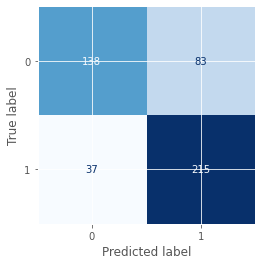

In [55]:
# 2nd iteration: Logistic regression without lemmatized word
cvec = CountVectorizer(stop_words=new_stopwords)
X_train_cvec, X_test_cvec = get_X_vectorizer(cvec)
print(f'# Columns without lemmatized word: {X_train_cvec.shape[1]}')

# Fit or train the model
logreg = LogisticRegression()
logreg.fit(X_train_cvec,y_train)

# Evaluation
second_iter_1 = evaluation(logreg, X_train_cvec, X_test_cvec)

In [56]:
# 2nd iteration: No lemmatized word
# label 0 mean architecture
coeff_log(logreg,0,25)

style        -1.996055
house        -1.964942
building     -1.712364
portfolio    -1.291116
sketch       -1.115164
chicago      -1.112226
styles       -1.104032
share        -1.086975
find         -1.060449
de           -1.039281
made         -1.037095
profession   -0.979914
indian       -0.968118
world        -0.957289
ai           -0.927298
designed     -0.914619
interior     -0.899892
concept      -0.891978
apartment    -0.872943
roof         -0.865530
housing      -0.864193
city         -0.859893
want         -0.853869
ba           -0.852577
ceiling      -0.849273
Name: 0, dtype: float64


In [57]:
# 2nd iteration: No lemmatized word
# label 1 mean civil engineer
coeff_log(logreg,1,25)

stress            0.815091
references        0.843770
computer          0.850721
topic             0.863179
geotechnical      0.881592
interview         0.885597
inspector         0.890085
career            0.890873
internship        0.903308
seeking           0.911702
work              0.912627
beam              0.913043
salary            0.927722
opportunities     0.950142
highway           0.980330
question          1.055683
jobs              1.058110
structural        1.125925
transportation    1.134626
ce                1.184390
water             1.352062
concrete          1.371618
company           1.451519
pe                1.643277
bridge            1.804189
Name: 0, dtype: float64


# Columns with lemmatized word: 3027
Training accuracy: 0.9612
Testing accuracy: 0.7526
Testing f1 score:0.7869


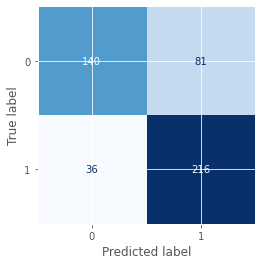

In [58]:
# 2nd iteration: Logistic regression with lemmatized word
cvec = CountVectorizer(stop_words=new_stopwords,tokenizer=LemmaTokenizer())
X_train_cvec, X_test_cvec = get_X_vectorizer(cvec)
print(f'# Columns with lemmatized word: {X_train_cvec.shape[1]}')

# Fit or train the model
logreg = LogisticRegression()
logreg.fit(X_train_cvec,y_train)

# Evaluation
second_iter_2 = evaluation(logreg, X_train_cvec, X_test_cvec)

In [59]:
# 2nd iteration: Lemmatized word
# label 0 mean architecture
coeff_log(logreg,0,25)

style           -2.167586
house           -1.926867
building        -1.601590
portfolio       -1.364500
indian          -1.301603
profession      -1.219649
home            -1.169965
chicago         -1.164024
sketch          -1.111035
share           -1.090386
render          -1.083224
image           -1.029316
find            -0.990943
part            -0.989192
made            -0.988170
villa           -0.987870
tower           -0.983226
room            -0.983110
marvel          -0.971521
apartment       -0.969477
software        -0.910017
housing         -0.909503
visualization   -0.904273
world           -0.899396
roof            -0.892811
Name: 0, dtype: float64


In [60]:
# 2nd iteration: Lemmatized word
# label 1 mean civil engineer
coeff_log(logreg,1,25)

stress            0.790638
beam              0.791527
industry          0.798937
master            0.803101
data              0.805988
earthquake        0.826891
resume            0.828802
career            0.878854
computer          0.880633
inspector         0.904680
interview         0.906686
geotechnical      0.940748
work              0.959658
utility           0.963822
exam              0.967384
seeking           0.978810
highway           0.993871
question          1.033787
transportation    1.150097
structural        1.161223
opportunity       1.202273
concrete          1.288080
water             1.416080
company           1.629614
bridge            1.715240
Name: 0, dtype: float64


In [61]:
# 2nd iteration: Lemmatized word
# Check the text in false prediction
y_pred_2nd_lemma = logreg.predict(X_test_cvec)
compare_y_df = pd.DataFrame(y_test)
compare_y_df['pred'] = y_pred_2nd_lemma
false_pred =  compare_y_df[compare_y_df['subreddit'] != compare_y_df['pred']]
false_pred

,subreddit,pred
1461,0,1
1811,0,1
188,1,0
1317,0,1
465,1,0
...,...,...
334,1,0
1114,0,1
1700,0,1
1393,0,1


In [62]:
# Title of false positive (81)
# Title from architecture, we predict it's from civil engineer.
list(X[false_pred[false_pred['pred']==1].index])[:10]

["Edwin Lutyens' Marshcourt",
 'The Shard of London touching the clouds',
 'How to add user defined properties to AutoCAD objects for export into Python?',
 'Book/reading suggestion about mass produced architecture and expression?',
 'What y think about this?',
 'Nelson Mandela Monument in Amsterdam, Netherland.',
 'Do you think text-to-image AI tools will benefit the work of architect?',
 'Australian Embassy in Baghdad',
 "who's your favorite architect and why?",
 'The abandoned Central Terminal in Buffalo, NY']

Almost all of title in false positive case is hard to define the subreddit. <br>
- Some of titles have the cheat words that we removed it earier. 

In [63]:
# Title of false negative (36)
# Title from civil engineer, we predict it's from architecture.
list(X[false_pred[false_pred['pred']==0].index])[:10]

['If the Romans Built Brick Pavers',
 'Who owns old Bell Telephone easements?',
 'Best software for designing steel frame structures',
 'Does anyone know the dimensions of this NY pipe coming from a building? ( I know it is an ask )',
 'why is head difference and head loss b/w two reservoir is equal?',
 'Looking for good online resource to find stress/strain curves for specific materials.',
 'Foundation,building question.',
 'Civil Engineering Universities in Europe',
 'Practice',
 'Architectural Marvels: Spectacular Rail Stations Around the World (Part 1)']

- Some of title in false negative case is hard to define the subreddit.
- Some of titles have the cheating words that we removed it earier.

### 2nd Iteration: Remove cheat word in model  (2)
Since, the first model of 2nd iteration is worked, we will try Naive Bayes model with the same parameter.

Vectorizer: Countvectorizer

3. Naive Bayes without lemmatized word
4. Naive Bayes with lemmatized word

# Columns without lemmatized word: 3573
Training accuracy: 0.9421
Testing accuracy: 0.7865
Testing f1 score:0.8112


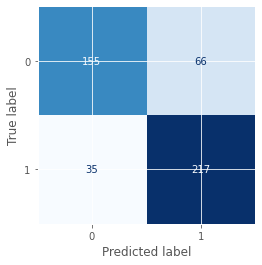

In [64]:
# 2nd iteration: Naive Bayes without lemmatized word
cvec = CountVectorizer(stop_words=new_stopwords)
X_train_cvec, X_test_cvec = get_X_vectorizer(cvec)
print(f'# Columns without lemmatized word: {X_train_cvec.shape[1]}')

# Fit or train the model
nb = MultinomialNB()
nb.fit(X_train_cvec,y_train)

# Evaluation
second_iter_3 = evaluation(nb, X_train_cvec, X_test_cvec)

# Columns with lemmatized word: 3027
Training accuracy: 0.9612
Testing accuracy: 0.7526
Testing f1 score:0.7869


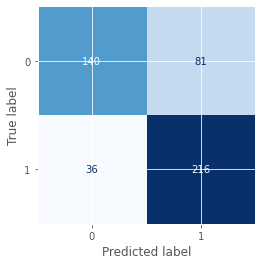

In [65]:
# 2nd iteration: Naive Bayes with lemmatized word
cvec = CountVectorizer(stop_words=new_stopwords,tokenizer=LemmaTokenizer())
X_train_cvec, X_test_cvec = get_X_vectorizer(cvec)
print(f'# Columns with lemmatized word: {X_train_cvec.shape[1]}')

# Fit or train the model
nb = LogisticRegression()
nb.fit(X_train_cvec,y_train)

# Evaluation
second_iter_4 = evaluation(nb, X_train_cvec, X_test_cvec)

### 2nd Iteration conclusion
Vectorizer: Countvectorizer
1. Logistic Regression without lemmatized word
2. Logistic Regression with lemmatized word
3. Naive Bayes without lemmatized word
4. Naive Bayes with lemmatized word

In [66]:
# create dataframe that contained score from 2nd iteration models
conclusion_2nd_iter = pd.DataFrame(columns=['training_accuracy',
                                          'testing_accuracy',
                                          'testing_f1_score'])
second_iter_list = [second_iter_1,second_iter_2,second_iter_3,second_iter_4]
for i in range(4):
    conclusion_2nd_iter.loc[i] = second_iter_list[i]

In [67]:
# 1st iteration: logistic regression with and without lemmatized word
conclusion_1st_iter

,training_accuracy,testing_accuracy,testing_f1_score
0,0.9831,0.8097,0.8327
1,0.9753,0.7928,0.8172


In [68]:
# 2nd iteration: logistic regression with and without lemmatized word
conclusion_2nd_iter.iloc[:2,:]

,training_accuracy,testing_accuracy,testing_f1_score
0,0.9788,0.7463,0.7818
1,0.9612,0.7526,0.7869


- Removing cheat word in the bag of words model, lower the accuracy of logistic regression model about 5%

In [69]:
# 2nd iteration: Naive bayes with and without lemmatized word
conclusion_2nd_iter.iloc[2:5,:]

,training_accuracy,testing_accuracy,testing_f1_score
2,0.9421,0.7865,0.8112
3,0.9612,0.7526,0.7869


- Naive Bayes models provide accuracy similar to logistic regression model but we can't interpret anything from Naive Bayes. So,  Logistic regression model might be better than Naive Bayes.

### 3rd iteration: Gridsearch and handle overfitting
Vectorizer: Countvectorizer
1. Logistic Regression with Lemmatized word
2. Handling overfitting of Logistic Regression with Lemmatized words
3. Naive Bayes with Lemmatized words

In [70]:
# create pipeline, countvectorize first and then feed to logistic regression
logreg_pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=new_stopwords, tokenizer=LemmaTokenizer())),
    ('logreg', LogisticRegression())
])

In [71]:
# tuning hyperparameter in countvectorizer
logreg_pipe_params = {
    'cvec__max_features' : [1000,1500,2000],
    'cvec__min_df' : [1, 2],
    'cvec__max_df' : [.8, .9],
}

In [72]:
# Instantiate GridSearchCV.
gs = GridSearchCV(logreg_pipe, #
                  param_grid = logreg_pipe_params,
                  cv=5) 
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [73]:
# checek best hyperparamter in gridsearchCV 
gs.best_params_

{'cvec__max_df': 0.8, 'cvec__max_features': 2000, 'cvec__min_df': 1}

Training accuracy: 0.935
Testing accuracy: 0.7526
Testing f1 score:0.7869


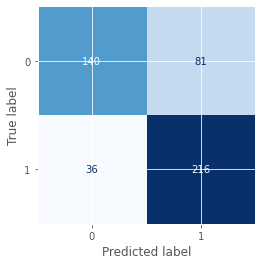

In [74]:
# return confusionmatrix from model
third_iter_1 = evaluation(gs, X_train, X_test)

In [75]:
def evaluation_overfit(model, X_train_vec, X_test_vec):
    '''
    return accuracy score from train and test
    '''
    y_preds = model.predict(X_test_vec)
    train_acc = round(model.score(X_train_vec,y_train),4)
    test_acc = round(model.score(X_test_vec,y_test),4)
    f1_test = round(f1_score(y_test, y_preds),4)
    print(f'Training accuracy: {train_acc}')
    print(f'Testing accuracy: {test_acc}')
    print(f'Testing f1 score:{f1_test}')
    return [train_acc, test_acc, f1_test]

In [76]:
# iterate relationship in training and testing via max_feature in countvectorizer
tuning_df = pd.DataFrame(columns= ['max_feature','training_accuracy','testing_accuracy','testing_f1_score'])
for i,k in enumerate([500, 700, 800, 900, 1000]):
    logreg_pipe = Pipeline([
        ('cvec', CountVectorizer(stop_words=new_stopwords, tokenizer=LemmaTokenizer(),
                                 max_df=0.8, max_features=k, min_df=1)),
        ('logreg', LogisticRegression())
    ])
    logreg_pipe.fit(X_train, y_train)
    print(f'max_feature = {k}')
    score = evaluation_overfit(logreg_pipe, X_train, X_test)
    tuning_df.loc[i] = [k] + score
    print(f'\n')

max_feature = 500
Training accuracy: 0.8411
Testing accuracy: 0.6977
Testing f1 score:0.7442


max_feature = 700
Training accuracy: 0.8679
Testing accuracy: 0.7209
Testing f1 score:0.7609


max_feature = 800
Training accuracy: 0.8792
Testing accuracy: 0.7273
Testing f1 score:0.765


max_feature = 900
Training accuracy: 0.8927
Testing accuracy: 0.7315
Testing f1 score:0.7703


max_feature = 1000
Training accuracy: 0.8997
Testing accuracy: 0.7378
Testing f1 score:0.7745




Accuracy scores from training and testing are correlate. We can't reduce overfitting of the logistic regression by tuning the hyperparameter in Countvectorizer. The testing accuracy from tuning hyperparameter is lower than logistic regression model 2 from 2nd iteration, then logistic regression model 2 from 2nd iteration may perform better than this model.

#### Naive Bayes

In [77]:
# instantiate pipeline which have countvectorizer and multinomial naive bayes
nb_pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=new_stopwords)),
    ('nb', MultinomialNB())
])

In [78]:
# set tuning hyperparameter
nb_pipe_params = {
    'cvec__max_features' : [2000, 2500],
    'cvec__min_df' : [1, 2],
    'cvec__max_df' : [.8, .9],
    'cvec__ngram_range' : [(1, 1)],
    'cvec__tokenizer' : [None, LemmaTokenizer()]
}

In [79]:
# Instantiate GridSearchCV and Multinomial nb and fit models.
nb_gs = GridSearchCV(nb_pipe, #
                  param_grid = nb_pipe_params,
                  cv=5) 
nb_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

Training accuracy: 0.9188
Testing accuracy: 0.7738
Testing f1 score:0.8022


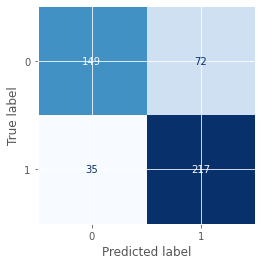

In [80]:
# plot confusion matrix and store model
third_iter_2 = evaluation(nb_gs, X_train, X_test)

### 3rd Iteration conclusion
Vectorizer: Countvectorizer
1. Logistic Regression with Lemmatized word
2. Handling overfitting of Logistic Regression with Lemmatized words
3. Naive Bayes with Lemmatized words

In [81]:
# create dataframe that contained score from 3rd iteration models
conclusion_3rd_iter = pd.DataFrame(columns=['training_accuracy',
                                          'testing_accuracy',
                                          'testing_f1_score'])
third_iter_list = [third_iter_1,third_iter_2]
for i in range(2):
    conclusion_3rd_iter.loc[i] = third_iter_list[i]

In [82]:
conclusion_3rd_iter

,training_accuracy,testing_accuracy,testing_f1_score
0,0.9350,0.7526,0.7869
1,0.9188,0.7738,0.8022


- Gridsearch the countvectorizer parameter can't handle the overfitting of the model for both logistic regression and Naive Bayes model.

In [83]:
tuning_df

,max_feature,training_accuracy,testing_accuracy,testing_f1_score
0,500.0,0.8411,0.6977,0.7442
1,700.0,0.8679,0.7209,0.7609
2,800.0,0.8792,0.7273,0.7650
3,900.0,0.8927,0.7315,0.7703
4,1000.0,0.8997,0.7378,0.7745


**Tuning the hyperparameter 'max_feature'**: when increase `max_feature`
- We can't handle overfitting because training and testing accuracy are correlated.
- Training and Test accuracy are always leaving the gap around 15%. 
- **Logistic regression model 2 from 2nd iteration may perform better than this model.**

### 4th Iteration: Other Classifier models
Vectorizer: Countvectorizer
1. Random forest with lemmatized word

#### Random Forest

In [87]:
# Random Forest 
rf_pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=new_stopwords)),
    ('rf', RandomForestClassifier())
])

In [88]:
# set value for tuning hyperparameter
rf_pipe_params = {
    'cvec__max_features' : [2000, 2500],
    'cvec__min_df' : [1, 2],
    'cvec__max_df' : [.8, .9],
    'cvec__ngram_range' : [(1, 1)],
    'cvec__tokenizer' : [LemmaTokenizer()],
    'rf__max_depth' : [5, 10, 15],
    'rf__n_estimators' : [100, 150, 200]
}

In [89]:
# Instantiate GridSearchCV and randomforeset and fit.
rf_gs = GridSearchCV(rf_pipe, #
                  param_grid = rf_pipe_params,
                  cv=3) 
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [90]:
# check best hyper parameter
rf_gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__tokenizer': <__main__.LemmaTokenizer at 0x18b989a25b0>,
 'rf__max_depth': 15,
 'rf__n_estimators': 100}

Training accuracy: 0.7507
Testing accuracy: 0.6786
Testing f1 score:0.7587


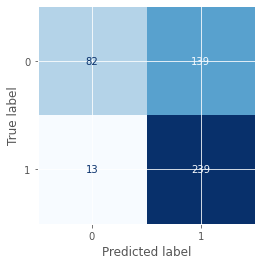

In [91]:
# plot confusion matrix from 4th iteration model
fourth_iter_1 = evaluation(rf_gs, X_train, X_test)

### 4th iteration conclusion

In [92]:
# create dataframe that contained score from 4th iteration models
conclusion_4th_iter = pd.DataFrame(columns=['training_accuracy',
                                          'testing_accuracy',
                                          'testing_f1_score'])
conclusion_4th_iter.loc[0] = fourth_iter_1
conclusion_4th_iter

,training_accuracy,testing_accuracy,testing_f1_score
0,0.7507,0.6786,0.7587


In [93]:
# 2nd iteration: logistic regression with and without lemmatized word
conclusion_2nd_iter.iloc[:2,:]

,training_accuracy,testing_accuracy,testing_f1_score
0,0.9788,0.7463,0.7818
1,0.9612,0.7526,0.7869


- Random forest model doesn't has testing accuracy higher than our 2nd iteration logistic regression model. 

# Part 5: Conclusion and Recommendation
---

## Conclusion

**Problem statement**: Is model accuracy rate high enough to beat baseline model?

- We already find that the basic logistic regression model perform better than baseline model.
- The classifier models that have more complex than logistic regression don't perform better than logistic regression
- So, we create actionable and explainable logistic regrssion model for using in the company for achieve the purpose of the project.
- The best model of this project is logistic regression model 2 from 2nd iteration
    - Preprocessing: Stop words removal, Lemmatizing word, remove cheat word
    - Model: Logistic regression

## Recommendation

**Corpus**
- If possible, the corpus that use for training the model is the real data from civil engineer and architecture document.
    - Buying data from other companies

**Modeling**
- Using the modern lemmatizer for better bag of words for feeding the model
- Using more complex algorithm for classify the text e.g. Neural Network, BERT.

**Next phase project**
- Gathering more quality corpus for modeling
- Might adpat the model for another work in the company for example, Using the model to classify the research of civil engineer and architecture. 
---